In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
features = pd.read_csv('DATA/lending_club_loan_two.csv')

In [4]:
zipc = pd.get_dummies(features['address'].apply(lambda x:x[-5:]),drop_first = True)
features[zipc.columns] = zipc[zipc.columns]
features = features.drop('address',axis = 1)

In [5]:
#sns.heatmap(features.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
features = features.drop('emp_title',axis = 1)

In [7]:
features['mort_acc'].fillna(0.0,inplace = True)

In [8]:
features.dropna(inplace = True)

In [9]:
#sns.heatmap(features.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
def clean_home_ownership(label):
    if label == 'NONE' or label == 'ANY':
        return 'OTHER'
    else:
        return label

In [11]:
features['home_ownership'] = features['home_ownership'].apply(clean_home_ownership)
ownershipdummies = pd.get_dummies(features['home_ownership'],drop_first = True)
features[ownershipdummies.columns] = ownershipdummies[ownershipdummies.columns]
features.drop('home_ownership',axis = 1,inplace = True)

In [12]:
def clean_verification(label):
    if 'Not' in label:
        return 0
    else:
        return 1

In [13]:
features['income_verified'] = features['verification_status'].apply(clean_verification)

In [14]:
incometemp = features['income_verified'].astype(np.uint8)
features['income_verified'] = incometemp

In [15]:
features = features.drop('verification_status',axis = 1)

In [16]:
features['Fully Paid'] = pd.get_dummies(features['loan_status'],drop_first = True)
features = features.drop('loan_status',axis = 1)

In [17]:
features = features.drop('title',axis = 1)

In [18]:
features['initial_list_status:w'] = pd.get_dummies(features['initial_list_status'],drop_first = True)
features.drop('initial_list_status',axis = 1,inplace = True)

In [19]:
application_type_dummies = pd.get_dummies(features['application_type'],drop_first = True)
features[application_type_dummies.columns] = application_type_dummies[application_type_dummies.columns]
features.drop('application_type',inplace = True,axis = 1)

In [20]:
def clean_bankruptcies(num):
    if num>2:
        return 2
    else:
        return num

In [21]:
#bankruptcy_counts = features['pub_rec_bankruptcies'].apply(clean_bankruptcies)

In [22]:
#bankruptcy_counts = pd.get_dummies(bankruptcy_counts,drop_first = True)

In [23]:
#features['1 bankruptcy'] = bankruptcy_counts[1.0]
#features['2 or more bankruptcies'] = bankruptcy_counts[2.0]

In [24]:
#features.drop('pub_rec_bankruptcies',axis = 1,inplace = True)

In [25]:
features['60 month term'] = pd.get_dummies(features['term'],drop_first = True)
features.drop('term',axis = 1,inplace = True)

In [26]:
subgrade_dummies = pd.get_dummies(features['sub_grade'],drop_first = True)
features[subgrade_dummies.columns] = subgrade_dummies[subgrade_dummies.columns]

In [27]:
features.drop(['grade','sub_grade'],axis = 1,inplace = True)

In [28]:
features.drop('emp_length',inplace = True,axis = 1)

In [29]:
def monthyear_to_num(date):
    ts = pd.to_datetime(date)
    return ts.year + (ts.month - 1)/12

In [30]:
features.drop('issue_d',axis = 1,inplace = True)

In [31]:
features['numerical earliest cr line'] = features['earliest_cr_line'].apply(monthyear_to_num)

In [32]:
features.drop('earliest_cr_line',axis = 1,inplace = True)

In [33]:
purposedummies = pd.get_dummies(features['purpose'],drop_first = True)
features[purposedummies.columns] = purposedummies[purposedummies.columns]
features.drop('purpose',axis = 1,inplace = True)

In [34]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375389 entries, 0 to 396029
Data columns (total 78 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   375389 non-null  float64
 1   int_rate                    375389 non-null  float64
 2   installment                 375389 non-null  float64
 3   annual_inc                  375389 non-null  float64
 4   dti                         375389 non-null  float64
 5   open_acc                    375389 non-null  float64
 6   pub_rec                     375389 non-null  float64
 7   revol_bal                   375389 non-null  float64
 8   revol_util                  375389 non-null  float64
 9   total_acc                   375389 non-null  float64
 10  mort_acc                    375389 non-null  float64
 11  pub_rec_bankruptcies        375389 non-null  float64
 12  05113                       375389 non-null  uint8  
 13  11650         

## Balancing data

In [35]:
features['Fully Paid'].value_counts()

1    303179
0     72210
Name: Fully Paid, dtype: int64

In [36]:
df = features[features['Fully Paid'] == 0]
paidSample_df = pd.concat([df,df,df,df,df.sample(n = 14339)])


In [37]:
paidSample_df

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,...,0,0,0,0,0,0,0,0,0,0
25,6000.0,11.36,197.47,46680.0,6.56,9.0,0.0,4370.0,40.1,10.0,...,0,0,0,1,0,0,0,0,0,0
26,8400.0,13.35,284.45,35000.0,23.08,6.0,0.0,6953.0,74.8,17.0,...,0,0,0,0,0,0,0,0,0,0
41,28000.0,19.91,312.04,52000.0,20.70,10.0,0.0,29178.0,87.6,16.0,...,0,0,0,0,0,0,0,0,0,0
48,16000.0,18.54,411.01,40000.0,37.26,16.0,0.0,13179.0,55.6,20.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374585,4000.0,15.61,139.86,30000.0,38.92,12.0,0.0,21769.0,64.6,17.0,...,0,0,0,0,0,0,0,0,0,0
107773,12000.0,16.29,293.67,74000.0,12.96,12.0,0.0,10705.0,39.0,30.0,...,0,0,0,0,0,0,0,0,0,0
180856,16800.0,19.99,445.01,131000.0,15.87,13.0,0.0,9296.0,70.9,33.0,...,0,0,1,0,0,0,0,0,0,0
193254,11200.0,11.47,369.18,150000.0,24.26,16.0,0.0,26675.0,67.5,23.0,...,1,0,0,0,0,0,0,0,0,0


In [51]:
balancedFeatures = pd.concat([features[features['Fully Paid'] == 1],paidSample_df])

In [52]:
balancedFeatures

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,...,0,0,0,0,0,0,0,0,0,0
5,20000.0,13.33,677.07,86788.0,16.31,8.0,0.0,25757.0,100.6,23.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374585,4000.0,15.61,139.86,30000.0,38.92,12.0,0.0,21769.0,64.6,17.0,...,0,0,0,0,0,0,0,0,0,0
107773,12000.0,16.29,293.67,74000.0,12.96,12.0,0.0,10705.0,39.0,30.0,...,0,0,0,0,0,0,0,0,0,0
180856,16800.0,19.99,445.01,131000.0,15.87,13.0,0.0,9296.0,70.9,33.0,...,0,0,1,0,0,0,0,0,0,0
193254,11200.0,11.47,369.18,150000.0,24.26,16.0,0.0,26675.0,67.5,23.0,...,1,0,0,0,0,0,0,0,0,0


In [53]:
balancedFeatures['Fully Paid'].value_counts()

1    303179
0    303179
Name: Fully Paid, dtype: int64

In [54]:
balancedFeatures['Fully Paid']

0         1
1         1
2         1
3         1
5         1
         ..
374585    0
107773    0
180856    0
193254    0
12393     0
Name: Fully Paid, Length: 606358, dtype: uint8

In [55]:
# shuffle in case this has an effect?
balancedFeatures = balancedFeatures.sample(frac = 1)

In [56]:
balancedFeatures['Fully Paid']

284019    1
147685    1
72143     1
167479    1
390125    0
         ..
113975    0
8802      1
172544    1
23471     1
90993     0
Name: Fully Paid, Length: 606358, dtype: uint8

In [57]:
balancedFeatures = balancedFeatures.reset_index()

In [60]:
balancedFeatures.drop(['index'],axis  =1)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,34725.0,17.86,879.15,115870.0,34.31,24.0,0.0,28393.0,45.0,56.0,...,0,0,0,0,0,0,0,0,0,0
1,20000.0,12.29,447.83,168000.0,8.53,13.0,0.0,43445.0,63.0,36.0,...,0,0,0,0,0,0,0,0,0,0
2,15000.0,11.14,492.08,45000.0,16.48,11.0,0.0,9032.0,51.6,17.0,...,0,0,0,0,0,0,0,0,0,0
3,30000.0,12.12,669.16,98000.0,15.20,7.0,0.0,5114.0,37.9,32.0,...,0,0,0,0,0,0,0,1,0,0
4,6000.0,18.25,217.67,35000.0,16.67,11.0,0.0,2906.0,11.7,12.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606353,5450.0,22.99,210.94,50000.0,18.63,10.0,1.0,1044.0,13.6,26.0,...,0,0,0,0,0,1,0,0,0,0
606354,5100.0,13.67,173.49,40000.0,7.99,10.0,0.0,8450.0,58.7,14.0,...,0,0,0,0,0,0,0,0,0,0
606355,3250.0,11.53,107.22,61000.0,29.37,10.0,0.0,17341.0,96.3,29.0,...,0,0,0,0,0,0,0,0,0,0
606356,12000.0,21.18,325.86,105000.0,11.28,9.0,0.0,10430.0,32.9,18.0,...,1,0,0,0,0,0,0,0,0,0


In [61]:
features = balancedFeatures.drop(['index'],axis = 1)

## Model building

In [64]:
from sklearn.model_selection import train_test_split
X = features.drop('Fully Paid',axis = 1).values
y = features['Fully Paid'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state = 101)

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [67]:
X_train.shape

(485086, 77)

In [68]:
from tensorflow.keras.layers import Dropout
model = Sequential()

# input layer
model.add(Dense(units = 77,  activation='sigmoid'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(units = 38, activation='sigmoid'))
model.add(Dropout(0.2))

# hidden layer
#model.add(Dense(units = 19, activation='sigmoid'))
#model.add(Dropout(0.2))


model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [69]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=75)

In [70]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=1000,
          batch_size = 256,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/1000
1895/1895 [==============================] - 10s 6ms/step - loss: 0.4523 - val_loss: 0.3705
Epoch 2/1000
1895/1895 [==============================] - 10s 5ms/step - loss: 0.3793 - val_loss: 0.3625
Epoch 3/1000
1895/1895 [==============================] - 11s 6ms/step - loss: 0.3680 - val_loss: 0.3588
Epoch 4/1000
1895/1895 [==============================] - 10s 5ms/step - loss: 0.3644 - val_loss: 0.3577
Epoch 5/1000
1895/1895 [==============================] - 11s 6ms/step - loss: 0.3619 - val_loss: 0.3575
Epoch 6/1000
1895/1895 [==============================] - 11s 6ms/step - loss: 0.3604 - val_loss: 0.3569
Epoch 7/1000
1895/1895 [==============================] - 10s 6ms/step - loss: 0.3595 - val_loss: 0.3561
Epoch 8/1000
1895/1895 [==============================] - 11s 6ms/step - loss: 0.3589 - val_loss: 0.3559
Epoch 9/1000
1895/1895 [==============================] - 10s 5ms/step - loss: 0.3582 - val_loss: 0.3557
Epoch 10/1000
1895/1895 [==============================

1895/1895 [==============================] - 10s 5ms/step - loss: 0.3515 - val_loss: 0.3519
Epoch 79/1000
1895/1895 [==============================] - 9s 5ms/step - loss: 0.3513 - val_loss: 0.3520
Epoch 80/1000
1895/1895 [==============================] - 10s 5ms/step - loss: 0.3512 - val_loss: 0.3518
Epoch 81/1000
1895/1895 [==============================] - 10s 5ms/step - loss: 0.3511 - val_loss: 0.3518
Epoch 82/1000
1895/1895 [==============================] - 10s 5ms/step - loss: 0.3510 - val_loss: 0.3518
Epoch 83/1000
1895/1895 [==============================] - 10s 5ms/step - loss: 0.3510 - val_loss: 0.3517
Epoch 84/1000
1895/1895 [==============================] - 10s 5ms/step - loss: 0.3510 - val_loss: 0.3518
Epoch 85/1000
1895/1895 [==============================] - 10s 5ms/step - loss: 0.3509 - val_loss: 0.3519
Epoch 86/1000
1895/1895 [==============================] - 10s 5ms/step - loss: 0.3509 - val_loss: 0.3516
Epoch 87/1000
1895/1895 [==============================] - 10

Epoch 155/1000
1895/1895 [==============================] - 11s 6ms/step - loss: 0.3476 - val_loss: 0.3493
Epoch 156/1000
1895/1895 [==============================] - 10s 5ms/step - loss: 0.3474 - val_loss: 0.3492
Epoch 157/1000
1895/1895 [==============================] - 11s 6ms/step - loss: 0.3476 - val_loss: 0.3493
Epoch 158/1000
1895/1895 [==============================] - 11s 6ms/step - loss: 0.3475 - val_loss: 0.3493
Epoch 159/1000
1895/1895 [==============================] - 10s 5ms/step - loss: 0.3476 - val_loss: 0.3492
Epoch 160/1000
1895/1895 [==============================] - 12s 6ms/step - loss: 0.3474 - val_loss: 0.3492
Epoch 161/1000
1895/1895 [==============================] - 13s 7ms/step - loss: 0.3474 - val_loss: 0.3491
Epoch 162/1000
1895/1895 [==============================] - 13s 7ms/step - loss: 0.3473 - val_loss: 0.3491
Epoch 163/1000
1895/1895 [==============================] - 13s 7ms/step - loss: 0.3474 - val_loss: 0.3491
Epoch 164/1000
1895/1895 [===========

1895/1895 [==============================] - 10s 5ms/step - loss: 0.3449 - val_loss: 0.3474
Epoch 232/1000
1895/1895 [==============================] - 10s 5ms/step - loss: 0.3451 - val_loss: 0.3478
Epoch 233/1000
1895/1895 [==============================] - 10s 5ms/step - loss: 0.3450 - val_loss: 0.3476
Epoch 234/1000
1895/1895 [==============================] - 10s 5ms/step - loss: 0.3452 - val_loss: 0.3476
Epoch 235/1000
1895/1895 [==============================] - 10s 5ms/step - loss: 0.3452 - val_loss: 0.3473
Epoch 236/1000
1895/1895 [==============================] - 11s 6ms/step - loss: 0.3451 - val_loss: 0.3474
Epoch 237/1000
1895/1895 [==============================] - 9s 5ms/step - loss: 0.3452 - val_loss: 0.3474
Epoch 238/1000
1895/1895 [==============================] - 10s 5ms/step - loss: 0.3446 - val_loss: 0.3473
Epoch 239/1000
1895/1895 [==============================] - 10s 5ms/step - loss: 0.3449 - val_loss: 0.3475
Epoch 240/1000
1895/1895 [===========================

1895/1895 [==============================] - 9s 5ms/step - loss: 0.3432 - val_loss: 0.3460
Epoch 309/1000
1895/1895 [==============================] - 8s 4ms/step - loss: 0.3435 - val_loss: 0.3460
Epoch 310/1000
1895/1895 [==============================] - 9s 5ms/step - loss: 0.3432 - val_loss: 0.3459
Epoch 311/1000
1895/1895 [==============================] - 8s 4ms/step - loss: 0.3429 - val_loss: 0.3460
Epoch 312/1000
1895/1895 [==============================] - 8s 4ms/step - loss: 0.3432 - val_loss: 0.3461
Epoch 313/1000
1895/1895 [==============================] - 9s 5ms/step - loss: 0.3432 - val_loss: 0.3459
Epoch 314/1000
1895/1895 [==============================] - 8s 4ms/step - loss: 0.3434 - val_loss: 0.3459
Epoch 315/1000
1895/1895 [==============================] - 8s 4ms/step - loss: 0.3430 - val_loss: 0.3458
Epoch 316/1000
1895/1895 [==============================] - 8s 4ms/step - loss: 0.3430 - val_loss: 0.3459
Epoch 317/1000
1895/1895 [==============================] - 9

Epoch 385/1000
1895/1895 [==============================] - 10s 5ms/step - loss: 0.3418 - val_loss: 0.3447
Epoch 386/1000
1895/1895 [==============================] - 11s 6ms/step - loss: 0.3417 - val_loss: 0.3450
Epoch 387/1000
1895/1895 [==============================] - 10s 5ms/step - loss: 0.3418 - val_loss: 0.3447
Epoch 388/1000
1895/1895 [==============================] - 10s 5ms/step - loss: 0.3418 - val_loss: 0.3448
Epoch 389/1000
1895/1895 [==============================] - 10s 5ms/step - loss: 0.3421 - val_loss: 0.3447
Epoch 390/1000
1895/1895 [==============================] - 10s 5ms/step - loss: 0.3418 - val_loss: 0.3449
Epoch 391/1000
1895/1895 [==============================] - 10s 5ms/step - loss: 0.3418 - val_loss: 0.3448
Epoch 392/1000
1895/1895 [==============================] - 10s 5ms/step - loss: 0.3418 - val_loss: 0.3447
Epoch 393/1000
1895/1895 [==============================] - 10s 5ms/step - loss: 0.3417 - val_loss: 0.3448
Epoch 394/1000
1895/1895 [===========

1895/1895 [==============================] - 11s 6ms/step - loss: 0.3407 - val_loss: 0.3438
Epoch 462/1000
1895/1895 [==============================] - 14s 7ms/step - loss: 0.3406 - val_loss: 0.3442
Epoch 463/1000
1895/1895 [==============================] - 14s 7ms/step - loss: 0.3409 - val_loss: 0.3440
Epoch 464/1000
1895/1895 [==============================] - 14s 7ms/step - loss: 0.3406 - val_loss: 0.3441
Epoch 465/1000
1895/1895 [==============================] - 12s 6ms/step - loss: 0.3409 - val_loss: 0.3442
Epoch 466/1000
1895/1895 [==============================] - 13s 7ms/step - loss: 0.3408 - val_loss: 0.3439
Epoch 467/1000
1895/1895 [==============================] - 14s 7ms/step - loss: 0.3406 - val_loss: 0.3439
Epoch 468/1000
1895/1895 [==============================] - 13s 7ms/step - loss: 0.3408 - val_loss: 0.3438
Epoch 469/1000
1895/1895 [==============================] - 14s 7ms/step - loss: 0.3406 - val_loss: 0.3441
Epoch 470/1000
1895/1895 [==========================

1895/1895 [==============================] - 15s 8ms/step - loss: 0.3399 - val_loss: 0.3432
Epoch 538/1000
1895/1895 [==============================] - 14s 7ms/step - loss: 0.3399 - val_loss: 0.3434
Epoch 539/1000
1895/1895 [==============================] - 13s 7ms/step - loss: 0.3400 - val_loss: 0.3433
Epoch 540/1000
1895/1895 [==============================] - 13s 7ms/step - loss: 0.3401 - val_loss: 0.3433
Epoch 541/1000
1895/1895 [==============================] - 13s 7ms/step - loss: 0.3400 - val_loss: 0.3432
Epoch 542/1000
1895/1895 [==============================] - 14s 7ms/step - loss: 0.3396 - val_loss: 0.3434
Epoch 543/1000
1895/1895 [==============================] - 17s 9ms/step - loss: 0.3398 - val_loss: 0.3431
Epoch 544/1000
1895/1895 [==============================] - 18s 9ms/step - loss: 0.3398 - val_loss: 0.3430
Epoch 545/1000
1895/1895 [==============================] - 14s 7ms/step - loss: 0.3398 - val_loss: 0.3435
Epoch 546/1000
1895/1895 [==========================

1895/1895 [==============================] - 9s 5ms/step - loss: 0.3389 - val_loss: 0.3427
Epoch 615/1000
1895/1895 [==============================] - 8s 4ms/step - loss: 0.3388 - val_loss: 0.3428
Epoch 616/1000
1895/1895 [==============================] - 9s 5ms/step - loss: 0.3392 - val_loss: 0.3429
Epoch 617/1000
1895/1895 [==============================] - 8s 4ms/step - loss: 0.3388 - val_loss: 0.3427
Epoch 618/1000
1895/1895 [==============================] - 8s 4ms/step - loss: 0.3391 - val_loss: 0.3429
Epoch 619/1000
1895/1895 [==============================] - 8s 4ms/step - loss: 0.3392 - val_loss: 0.3427
Epoch 620/1000
1895/1895 [==============================] - 8s 4ms/step - loss: 0.3391 - val_loss: 0.3428
Epoch 621/1000
1895/1895 [==============================] - 8s 4ms/step - loss: 0.3391 - val_loss: 0.3428
Epoch 622/1000
1895/1895 [==============================] - 8s 4ms/step - loss: 0.3388 - val_loss: 0.3427
Epoch 623/1000
1895/1895 [==============================] - 9

1895/1895 [==============================] - 8s 4ms/step - loss: 0.3382 - val_loss: 0.3421
Epoch 692/1000
1895/1895 [==============================] - 8s 4ms/step - loss: 0.3384 - val_loss: 0.3420
Epoch 693/1000
1895/1895 [==============================] - 8s 4ms/step - loss: 0.3383 - val_loss: 0.3419
Epoch 694/1000
1895/1895 [==============================] - 8s 4ms/step - loss: 0.3388 - val_loss: 0.3422
Epoch 695/1000
1895/1895 [==============================] - 8s 4ms/step - loss: 0.3382 - val_loss: 0.3421
Epoch 696/1000
1895/1895 [==============================] - 9s 5ms/step - loss: 0.3382 - val_loss: 0.3422
Epoch 697/1000
1895/1895 [==============================] - 8s 4ms/step - loss: 0.3384 - val_loss: 0.3421
Epoch 698/1000
1895/1895 [==============================] - 8s 4ms/step - loss: 0.3383 - val_loss: 0.3425
Epoch 699/1000
1895/1895 [==============================] - 8s 4ms/step - loss: 0.3382 - val_loss: 0.3421
Epoch 700/1000
1895/1895 [==============================] - 9

1895/1895 [==============================] - 9s 5ms/step - loss: 0.3378 - val_loss: 0.3420
Epoch 769/1000
1895/1895 [==============================] - 9s 5ms/step - loss: 0.3379 - val_loss: 0.3418
Epoch 770/1000
1895/1895 [==============================] - 9s 5ms/step - loss: 0.3382 - val_loss: 0.3420
Epoch 771/1000
1895/1895 [==============================] - 8s 4ms/step - loss: 0.3380 - val_loss: 0.3418
Epoch 772/1000
1895/1895 [==============================] - 8s 4ms/step - loss: 0.3377 - val_loss: 0.3418
Epoch 773/1000
1895/1895 [==============================] - 8s 4ms/step - loss: 0.3378 - val_loss: 0.3418
Epoch 774/1000
1895/1895 [==============================] - 8s 4ms/step - loss: 0.3378 - val_loss: 0.3417
Epoch 775/1000
1895/1895 [==============================] - 8s 4ms/step - loss: 0.3378 - val_loss: 0.3420
Epoch 776/1000
1895/1895 [==============================] - 9s 5ms/step - loss: 0.3376 - val_loss: 0.3421
Epoch 777/1000
1895/1895 [==============================] - 8

1895/1895 [==============================] - 9s 5ms/step - loss: 0.3376 - val_loss: 0.3415
Epoch 846/1000
1895/1895 [==============================] - 8s 4ms/step - loss: 0.3375 - val_loss: 0.3417
Epoch 847/1000
1895/1895 [==============================] - 9s 5ms/step - loss: 0.3374 - val_loss: 0.3416
Epoch 848/1000
1895/1895 [==============================] - 8s 4ms/step - loss: 0.3371 - val_loss: 0.3416
Epoch 849/1000
1895/1895 [==============================] - 8s 4ms/step - loss: 0.3376 - val_loss: 0.3417
Epoch 850/1000
1895/1895 [==============================] - 15s 8ms/step - loss: 0.3376 - val_loss: 0.3421
Epoch 851/1000
1895/1895 [==============================] - 14s 8ms/step - loss: 0.3374 - val_loss: 0.3414
Epoch 852/1000
1895/1895 [==============================] - 13s 7ms/step - loss: 0.3373 - val_loss: 0.3415
Epoch 853/1000
1895/1895 [==============================] - 16s 9ms/step - loss: 0.3372 - val_loss: 0.3415
Epoch 854/1000
1895/1895 [==============================]

1895/1895 [==============================] - 16s 8ms/step - loss: 0.3372 - val_loss: 0.3415
Epoch 922/1000
1895/1895 [==============================] - 14s 8ms/step - loss: 0.3373 - val_loss: 0.3418
Epoch 923/1000
1895/1895 [==============================] - 13s 7ms/step - loss: 0.3370 - val_loss: 0.3415
Epoch 924/1000
1895/1895 [==============================] - 16s 8ms/step - loss: 0.3367 - val_loss: 0.3414
Epoch 925/1000
1895/1895 [==============================] - 14s 8ms/step - loss: 0.3367 - val_loss: 0.3415
Epoch 926/1000
1895/1895 [==============================] - 16s 8ms/step - loss: 0.3366 - val_loss: 0.3414
Epoch 927/1000
1895/1895 [==============================] - 16s 8ms/step - loss: 0.3369 - val_loss: 0.3414
Epoch 928/1000
1895/1895 [==============================] - 14s 8ms/step - loss: 0.3368 - val_loss: 0.3414
Epoch 929/1000
1895/1895 [==============================] - 15s 8ms/step - loss: 0.3370 - val_loss: 0.3416
Epoch 930/1000
1895/1895 [==========================

1895/1895 [==============================] - 15s 8ms/step - loss: 0.3366 - val_loss: 0.3414
Epoch 998/1000
1895/1895 [==============================] - 14s 8ms/step - loss: 0.3365 - val_loss: 0.3414
Epoch 999/1000
1895/1895 [==============================] - 17s 9ms/step - loss: 0.3364 - val_loss: 0.3414
Epoch 1000/1000
1895/1895 [==============================] - 14s 7ms/step - loss: 0.3369 - val_loss: 0.3412


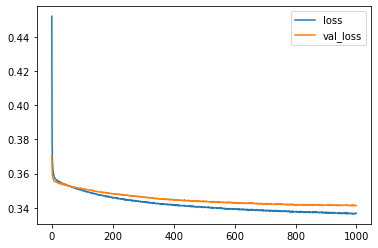

In [71]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [72]:
pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [73]:
from sklearn.metrics import classification_report,confusion_matrix

In [74]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82     60753
           1       0.83      0.79      0.81     60519

    accuracy                           0.81    121272
   macro avg       0.81      0.81      0.81    121272
weighted avg       0.81      0.81      0.81    121272

